# Sistem Rekomendasi Film dengan TensorFlow
source: https://www.youtube.com/watch?v=6N2vo3JZg2c&list=PL3VpLbLyLE56IVsWwn_rlv9IGGNiyab9e&t=4127s

tahap dalam pembuatan sistem rekomendasi film:
1. Load dataset
2. Pisah data (train dan test)
3. Membuat model
4. Training model
5. Mencoba Model yang Telah Dibuat
5. Menyimpan model

### Import library untuk dataset

In [653]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load dataset

In [654]:
ratings = pd.read_csv('ratings.csv')
ratings.sample(5)

,movie_id,user_id,user_rating
18877,591,715,4.0
12909,209,292,5.0
90043,304,30,4.0
71608,200,546,5.0
19007,95,454,2.0


In [655]:
movies = pd.read_csv('movies.csv')
movies.sample(5)

,movie_id,movie_title,movie_genres_str
1166,1167,"Sum of Us, The (1994)","[""Children's""]"
312,313,Titanic (1997),"['unknown', 'Documentary', 'Romance']"
1295,1296,Indian Summer (1996),"[""Children's"", 'Documentary']"
526,527,Gandhi (1982),['Documentary']
352,353,Deep Rising (1998),"['unknown', 'Film-Noir', 'Sci-Fi']"


jumlah film: 1682
jumlah user: 943

jumlah rating yang diberikan:
5.0    21201
4.0    34174
3.0    27145
2.0    11370
1.0     6110
Name: user_rating, dtype: int64


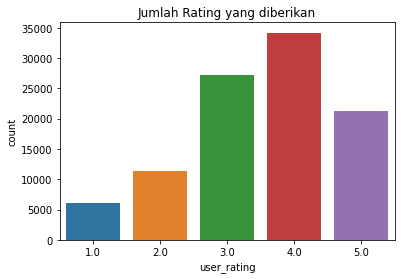

In [656]:
#melihat jumlah film dan user
jml_movie = movies['movie_id'].nunique()
jml_user = ratings['user_id'].nunique()
print("jumlah film:", jml_movie)
print("jumlah user:", jml_user)

#melihat jumlah rating yang diberikan 
sns.countplot(data=ratings, x='user_rating').set_title('Jumlah Rating yang diberikan')
print('\njumlah rating yang diberikan:')
print(ratings['user_rating'].value_counts().sort_index(ascending=False))


informasi: 
- Data film sebanyak 1682 data, dengan 943 user
- Jumlah rating terbanyak adalah 4, dan paling sedikit adalah 1

### 2. Pisah data (train dan test)

In [657]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(ratings, test_size=0.2, random_state=42)

print("jumlah data train:", data_train.shape)
print("jumlah data test :", data_test.shape)

jumlah data train: (80000, 3)
jumlah data test : (20000, 3)


In [658]:
data_train

,movie_id,user_id,user_rating
75220,1016,109,5.0
48955,64,316,4.0
44966,89,200,5.0
13568,174,109,5.0
92727,204,788,3.0
...,...,...,...
6265,125,25,5.0
54886,156,704,3.0
76820,288,422,3.0
860,168,198,4.0


In [659]:
data_test

,movie_id,user_id,user_rating
75721,876,817,4.0
80184,580,83,4.0
19864,393,389,2.0
76699,54,774,1.0
92991,420,712,3.0
...,...,...,...
32595,144,823,5.0
29313,639,339,4.0
37862,222,763,5.0
53421,419,399,3.0


### 3. Membuat Model

dalam tensorflow keras model terdapat input layer, hidden layer, dan output layer

data masuk ke input layer, kemudian diolah oleh hidden layer, dan hasilnya akan keluar dari output layer

hasil yang dikeluarkan oleh output layer adalah nilai prediksi

In [694]:
#import tensorflow keras
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot

#membuat input layer dari movie dan user, ukuran masing-masing input adalah 1
movie_input = Input(shape=[1])
user_input = Input(shape=[1])

#membuat embedding layer untuk movie dan user
#semakin banyak size embedding, semakin banyak informasi yang dapat dikenali oleh model
#semakin banyak size embedding, rawan untuk overfitting
#jika size embedding terlalu kecil, maka model akan menghafalkan data, sarannya jadi itu-itu aja
embedding_size = 40
movie_embedding = Embedding(jml_movie+1, embedding_size)(movie_input)
user_embedding = Embedding(jml_user+1, embedding_size)(user_input)

#membuat flatten layer
#flatten layer bertujuan untuk mengubah bentuk data menjadi 1 dimensi
movie_flatten = Flatten()(movie_embedding)
user_flatten = Flatten()(user_embedding)

#membuat output layer
#output layer bertujuan untuk menghasilkan nilai rating
output = Dot(axes=1)([movie_flatten, user_flatten])

#membuat model
model = Model([movie_input, user_input], output)


In [695]:
model.summary()

Model: "model_36"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_75 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_76 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 embedding_74 (Embedding)       (None, 1, 40)        67320       ['input_75[0][0]']               
                                                                                                  
 embedding_75 (Embedding)       (None, 1, 40)        37760       ['input_76[0][0]']               
                                                                                           

### 4. Training Model

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam', loss='mse')

In [697]:
#training model
history = model.fit(x=[data_train.movie_id, data_train.user_id], y=data_train.user_rating, 
                    validation_data=([data_test.movie_id, data_test.user_id], data_test.user_rating),
                    epochs=20, 
                    batch_size=256, 
                    verbose=1)

Epoch 1/20
313/313 [==============================] - 1s 2ms/step - loss: 13.4141 - val_loss: 11.5266
Epoch 2/20
313/313 [==============================] - 1s 2ms/step - loss: 5.7194 - val_loss: 2.0924
Epoch 3/20
313/313 [==============================] - 1s 2ms/step - loss: 1.4972 - val_loss: 1.1994
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 1.0580 - val_loss: 1.0113
Epoch 5/20
313/313 [==============================] - 1s 2ms/step - loss: 0.9357 - val_loss: 0.9474
Epoch 6/20
313/313 [==============================] - 1s 2ms/step - loss: 0.8832 - val_loss: 0.9185
Epoch 7/20
313/313 [==============================] - 1s 2ms/step - loss: 0.8534 - val_loss: 0.8998
Epoch 8/20
313/313 [==============================] - 1s 2ms/step - loss: 0.8324 - val_loss: 0.8902
Epoch 9/20
313/313 [==============================] - 1s 2ms/step - loss: 0.8147 - val_loss: 0.8829
Epoch 10/20
313/313 [==============================] - 1s 2ms/step - loss: 0.7999 - val_loss: 0.87

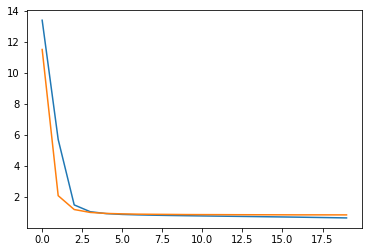

In [698]:
import matplotlib.pyplot as plt

losses = pd.DataFrame(history.history)
plt.plot(losses)

In [699]:
#evaluasi model
model.evaluate([data_test.movie_id, data_test.user_id], data_test.user_rating)

625/625 [==============================] - 1s 1ms/step - loss: 0.8529


0.852933406829834

### 5. Mencoba Model yang Telah Dibuat

In [706]:
import numpy as np
import matplotlib.pyplot as plt

def get_recommendations(user_id, movies, model):
  movies = movies.copy()
  user_ids = np.array([user_id] * len(movies))
  results = model([movies.movie_id.values, user_ids]).numpy().reshape(-1)

  movies['predicted_rating'] = pd.Series(results)
  movies = movies.sort_values('predicted_rating', ascending=False)

  print(f'Recommendations for user {user_id}')
  return movies

get_recommendations(898, movies, model).head(10)

Recommendations for user 898


,movie_id,movie_title,movie_genres_str,predicted_rating
1061,1062,Four Days in September (1997),['Documentary'],4.143601
1374,1375,"Cement Garden, The (1993)",['Documentary'],4.124920
250,251,Shall We Dance? (1996),"[""Children's""]",4.114912
63,64,"Shawshank Redemption, The (1994)",['Documentary'],4.112844
1448,1449,Pather Panchali (1955),['Documentary'],4.087864
301,302,L.A. Confidential (1997),"['Comedy', 'Fantasy', 'Mystery', 'Thriller']",4.066600
11,12,"Usual Suspects, The (1995)","['Comedy', 'Thriller']",4.043415
1366,1367,Faust (1994),['Adventure'],4.041574
168,169,"Wrong Trousers, The (1993)","['Adventure', ""Children's""]",4.034768
317,318,Schindler's List (1993),"['Documentary', 'Western']",4.017389


### 6. Menyimpan Model

simpan model dengan format .h5

In [667]:
#model.save('model.h5')

simpan model dengan format .json,
jika gagal coba jalankan di google colaboratory

In [668]:
'''
from zipfile import ZipFile
import os

with ZipFile('tfjs_model.zip', 'w') as z:
  for filename in os.listdir('tfjs_model'): 
    filepath = os.path.join('tfjs_model', filename)
    z.write(filepath)
'''

"\nfrom zipfile import ZipFile\nimport os\n\nwith ZipFile('tfjs_model.zip', 'w') as z:\n  for filename in os.listdir('tfjs_model'): \n    filepath = os.path.join('tfjs_model', filename)\n    z.write(filepath)\n"